## SC1015 Project

Why are some songs more popular than others? What makes a song popular? In this project, we utilize the Song Popularity Dataset on Kaggle to find out if the popularity of a song can be determined by acoustic data such as acousticness, danceability, liveliness and energy.

We aim to:
1. Accurately predict how popular songs are/will be based upon their characteristics. (Testing on songs in the Spotify Music Dataset)
2. Demonstrate how relevant our predictions are in real life by predicting the popularity of songs on the Billboard top 100 and checking whether their popularity is reflected y the predictions of our model.

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

Create a dataframe from the dataset

In [68]:
songdata = pd.read_csv('data/song_data.csv')
songdata = songdata.sort_values(["song_popularity"], ascending = (False))
songdata.head(20)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
7568,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
15091,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
17392,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
14176,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
11665,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
11697,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
5593,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
4299,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
16497,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
17590,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671


In [69]:
print("Shape: ", songdata.shape)
songdata.dtypes

Shape:  (18835, 15)


song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

In [70]:
songdata.info

<bound method DataFrame.info of                                      song_name  song_popularity  \
7568                                   Happier              100   
15091                                  Happier              100   
17392                                  Happier              100   
14176                                  Happier              100   
11665                                  Happier              100   
...                                        ...              ...   
7579                                Fine China                0   
7119   Gina Rodriguez - Latinos Trending Intro                0   
8922                Coupe (feat. Rich The Kid)                0   
10479                                Forastero                0   
11221                                 Carnaval                0   

       song_duration_ms  acousticness  danceability  energy  instrumentalness  \
7568             214289        0.1910         0.687   0.792           0.00000   
1

### Step 1
Clean the dataset to remove duplicate songs.

Reference: https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f

In [71]:
songdata.groupby(['song_name']).count()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_name,,,,,,,,,,,,,,
"""40"" - Live Version 1983",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"""45""",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"""99""",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"""Heroes"" - Single Version; 2014 Remastered Version",1,1,1,1,1,1,1,1,1,1,1,1,1,1
#CaixaGang,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
通過驗證,1,1,1,1,1,1,1,1,1,1,1,1,1,1
都市森林,1,1,1,1,1,1,1,1,1,1,1,1,1,1
비상연락음,1,1,1,1,1,1,1,1,1,1,1,1,1,1


We can use the _duplicated()_ function to find duplicates in the dataset. As can be seen from the sum, there are 5,765 duplicated rows with the same song_name variable value.

In [72]:
songdata.song_name.duplicated().sum()

5765

View duplicate rows:

In [73]:
songdata.loc[songdata.song_name.duplicated(), :]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
15091,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.1670,-2.749,1,0.0452,100.015,4,0.671
17392,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.1670,-2.749,1,0.0452,100.015,4,0.671
14176,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.1670,-2.749,1,0.0452,100.015,4,0.671
11665,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.1670,-2.749,1,0.0452,100.015,4,0.671
11697,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.1670,-2.749,1,0.0452,100.015,4,0.671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7585,Kiss and Make Up,0,189173,0.0658,0.678,0.729,0.0,8,0.3030,-4.188,1,0.1370,99.895,4,0.643
3435,Coupe (feat. Rich The Kid),0,194632,0.0520,0.843,0.643,0.0,11,0.0973,-8.420,1,0.2170,150.033,4,0.851
7579,Fine China,0,141586,0.0484,0.656,0.542,0.0,7,0.1260,-7.358,1,0.3230,166.111,4,0.551
8922,Coupe (feat. Rich The Kid),0,194632,0.0520,0.843,0.643,0.0,11,0.0973,-8.420,1,0.2170,150.033,4,0.851


Finally, to drop the duplicate rows, we can use the _drop_duplicates()_ function to drop the rows with duplicates from the dataframe. We set `keep` to `first` to keep only the first occurrence of the row, and set `inplace=True` to update the original dataframe. 

In [74]:
songdata.drop_duplicates(subset=['song_name'], keep='first', inplace=True)
print('New shape: ', songdata.shape)
songdata.head()

New shape:  (13070, 15)


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
7568,Happier,100,214289,0.1910,0.687,0.792,0.000000,5,0.1670,-2.749,1,0.0452,100.015,4,0.671
1229,I Love It (& Lil Pump),99,127946,0.0114,0.901,0.522,0.000000,2,0.2590,-8.304,1,0.3300,104.053,4,0.329
12665,Eastside (with Halsey & Khalid),98,173799,0.5550,0.560,0.680,0.000000,6,0.1160,-7.648,0,0.3210,89.391,4,0.319
15879,In My Feelings,98,217925,0.0589,0.835,0.626,0.000060,1,0.3960,-5.833,1,0.1250,91.030,4,0.350
61,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",98,212500,0.1530,0.841,0.798,0.000003,1,0.0618,-4.206,0,0.2290,95.948,4,0.591


We have about 13K unique songs. We can probably parse the song name and categorized it by language as well.

### Step 2
Perform exploratory analysis on the acoustic data of the songs.

> Use the following code to identify other non-English languages in Song Name among the 13070 records

In [75]:
songdata = songdata.sort_values(["song_popularity"], ascending = (False))
songdata.head(50)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
7568,Happier,100,214289,0.19100,0.687,0.792,0.000000,5,0.1670,-2.749,1,0.0452,100.015,4,0.671
1229,I Love It (& Lil Pump),99,127946,0.01140,0.901,0.522,0.000000,2,0.2590,-8.304,1,0.3300,104.053,4,0.329
12665,Eastside (with Halsey & Khalid),98,173799,0.55500,0.560,0.680,0.000000,6,0.1160,-7.648,0,0.3210,89.391,4,0.319
15879,In My Feelings,98,217925,0.05890,0.835,0.626,0.000060,1,0.3960,-5.833,1,0.1250,91.030,4,0.350
61,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",98,212500,0.15300,0.841,0.798,0.000003,1,0.0618,-4.206,0,0.2290,95.948,4,0.591
11899,Promises (with Sam Smith),98,213309,0.01190,0.781,0.768,0.000005,11,0.3250,-5.991,1,0.0394,123.070,4,0.486
1250,SICKO MODE,97,312820,0.00513,0.834,0.730,0.000000,8,0.1240,-3.714,1,0.2220,155.008,4,0.446
15664,Falling Down,97,196400,0.01750,0.669,0.574,0.002940,4,0.1460,-6.442,0,0.0286,120.013,4,0.273
7656,In My Mind,97,184560,0.17600,0.694,0.770,0.000011,6,0.1180,-5.335,1,0.1490,125.905,4,0.163
17587,Lucid Dreams,97,239835,0.34900,0.511,0.566,0.000000,6,0.3400,-7.230,0,0.2000,83.903,4,0.218


In [76]:
# Summary Statistics for numeric Variables
songdata.describe().round(3)

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,13070.000,13070.000,13070.000,13070.000,13070.000,13070.000,13070.000,13070.000,13070.000,13070.000,13070.000,13070.000,13070.000,13070.000
mean,49.710,218720.799,0.276,0.625,0.637,0.097,5.325,0.180,-7.769,0.634,0.101,121.134,3.952,0.529
std,20.088,63412.881,0.301,0.159,0.224,0.247,3.584,0.145,4.115,0.482,0.105,29.149,0.321,0.249
min,0.000,12000.000,0.000,0.000,0.001,0.000,0.000,0.012,-38.768,0.000,0.000,0.000,0.000,0.000
25%,39.000,183293.000,0.025,0.525,0.492,0.000,2.000,0.093,-9.484,0.000,0.037,98.074,4.000,0.334
50%,52.000,211588.500,0.146,0.637,0.669,0.000,5.000,0.122,-6.826,1.000,0.054,120.016,4.000,0.529
75%,64.000,244516.500,0.477,0.742,0.815,0.006,8.000,0.223,-5.029,1.000,0.115,139.954,4.000,0.729
max,100.000,1799346.000,0.996,0.987,0.997,0.997,11.000,0.986,1.585,1.000,0.941,242.318,5.000,0.984


Sequence of Box Plots: 
1 )  song_popularity
Number of outliers =  285 

2 )  song_duration_ms
Number of outliers =  569 

3 )  acousticness
Number of outliers =  0 

4 )  danceability
Number of outliers =  104 

5 )  energy
Number of outliers =  28 

6 )  instrumentalness
Number of outliers =  2810 

7 )  key
Number of outliers =  0 

8 )  liveness
Number of outliers =  828 

9 )  loudness
Number of outliers =  518 

10 )  audio_mode
Number of outliers =  0 

11 )  speechiness
Number of outliers =  1584 

12 )  tempo
Number of outliers =  61 

13 )  time_signature
Number of outliers =  867 

14 )  audio_valence
Number of outliers =  0 



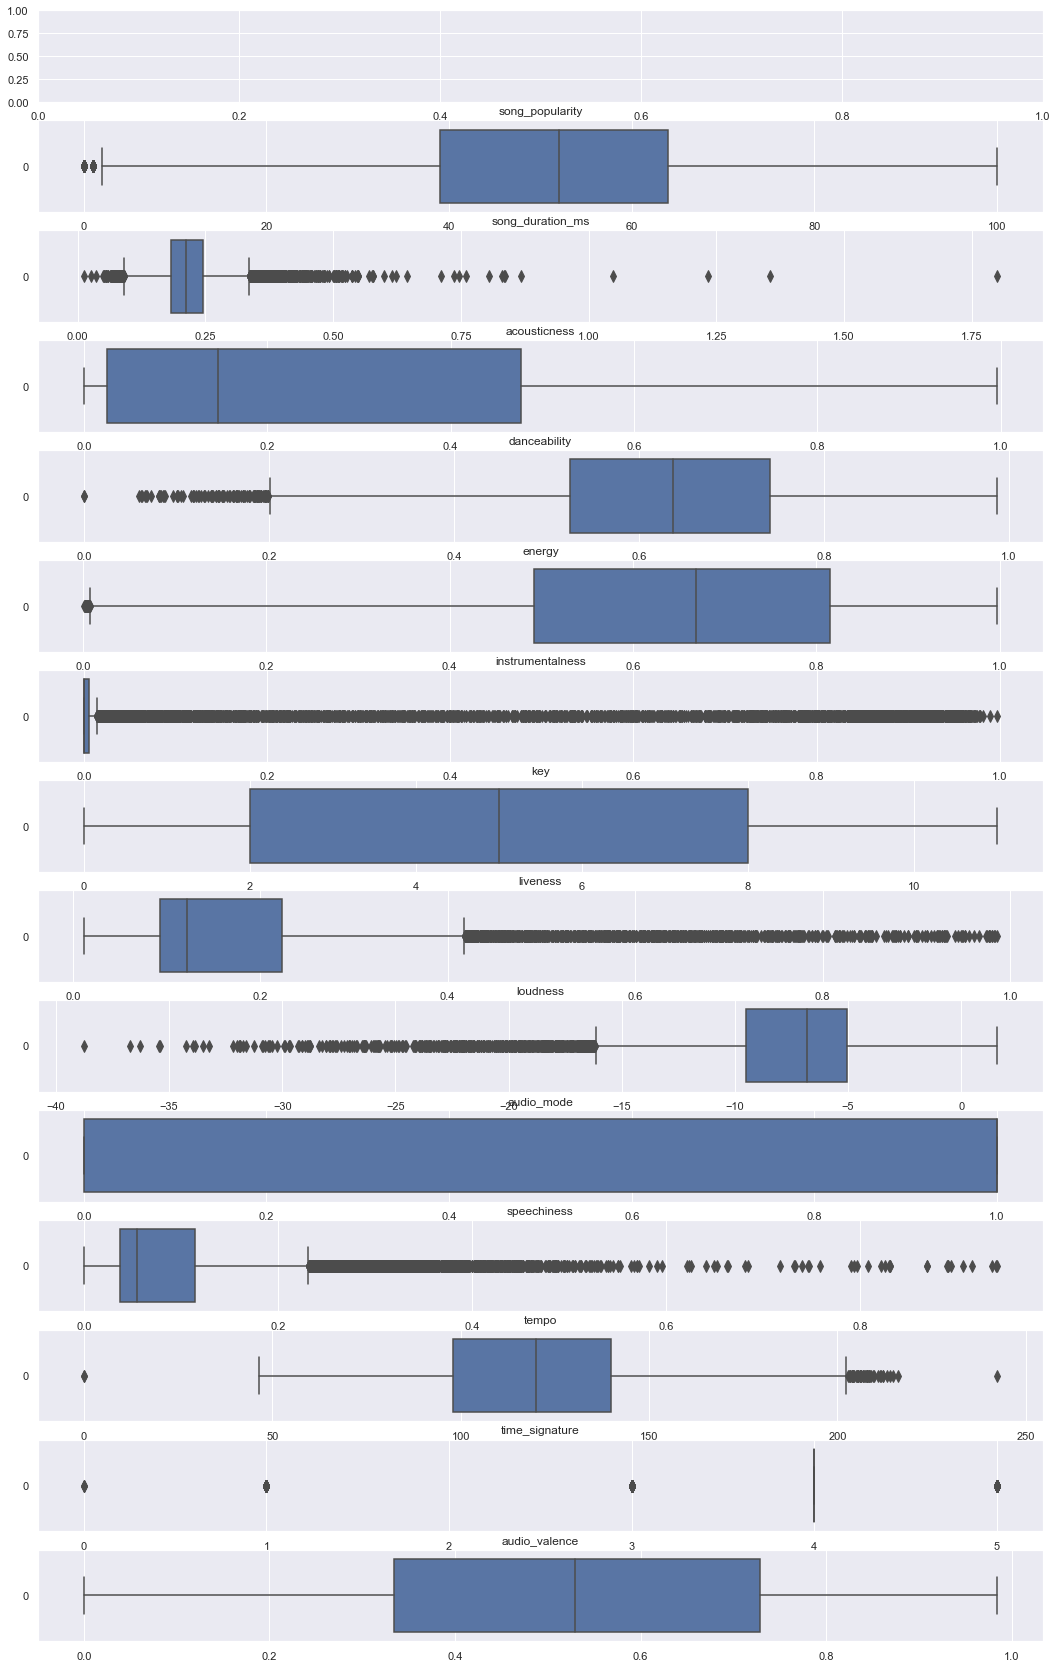

In [77]:
# Draw the box-plot distribution of all 14 numeric variables

# import data about boxplots from matplotlib (since SeaBorn uses MatPlotLib for plotting)
from matplotlib.cbook import boxplot_stats  
f, axes = plt.subplots(15, 1, figsize=(18, 30))

count = 0

print("Sequence of Box Plots: ")
for var in songdata:
    if(var != "song_name"):
        print(count, ") ", var)
        print("Number of outliers = ", len(boxplot_stats(songdata[var]).pop(0)['fliers']), "\n")
        sb.boxplot(data = songdata[var], orient = "h", ax = axes[count], fliersize = 8.0)
        axes[count].set_title(var)
    
    count += 1

Sequence of Plots: 
0 )  song_popularity
Skewness: -0.592
Kurtosis: -0.057
1 )  song_duration_ms
Skewness: 3.548
Kurtosis: 51.612
2 )  acousticness
Skewness: 0.960
Kurtosis: -0.399
3 )  danceability
Skewness: -0.412
Kurtosis: -0.057
4 )  energy
Skewness: -0.599
Kurtosis: -0.272
5 )  instrumentalness
Skewness: 2.572
Kurtosis: 5.102
6 )  key
Skewness: -0.019
Kurtosis: -1.295
7 )  liveness
Skewness: 2.234
Kurtosis: 5.921
8 )  loudness
Skewness: -1.868
Kurtosis: 5.797
9 )  audio_mode
Skewness: -0.555
Kurtosis: -1.692
10 )  speechiness
Skewness: 2.401
Kurtosis: 7.520
11 )  tempo
Skewness: 0.431
Kurtosis: -0.219
12 )  time_signature
Skewness: -4.642
Kurtosis: 39.359
13 )  audio_valence
Skewness: -0.033
Kurtosis: -0.987


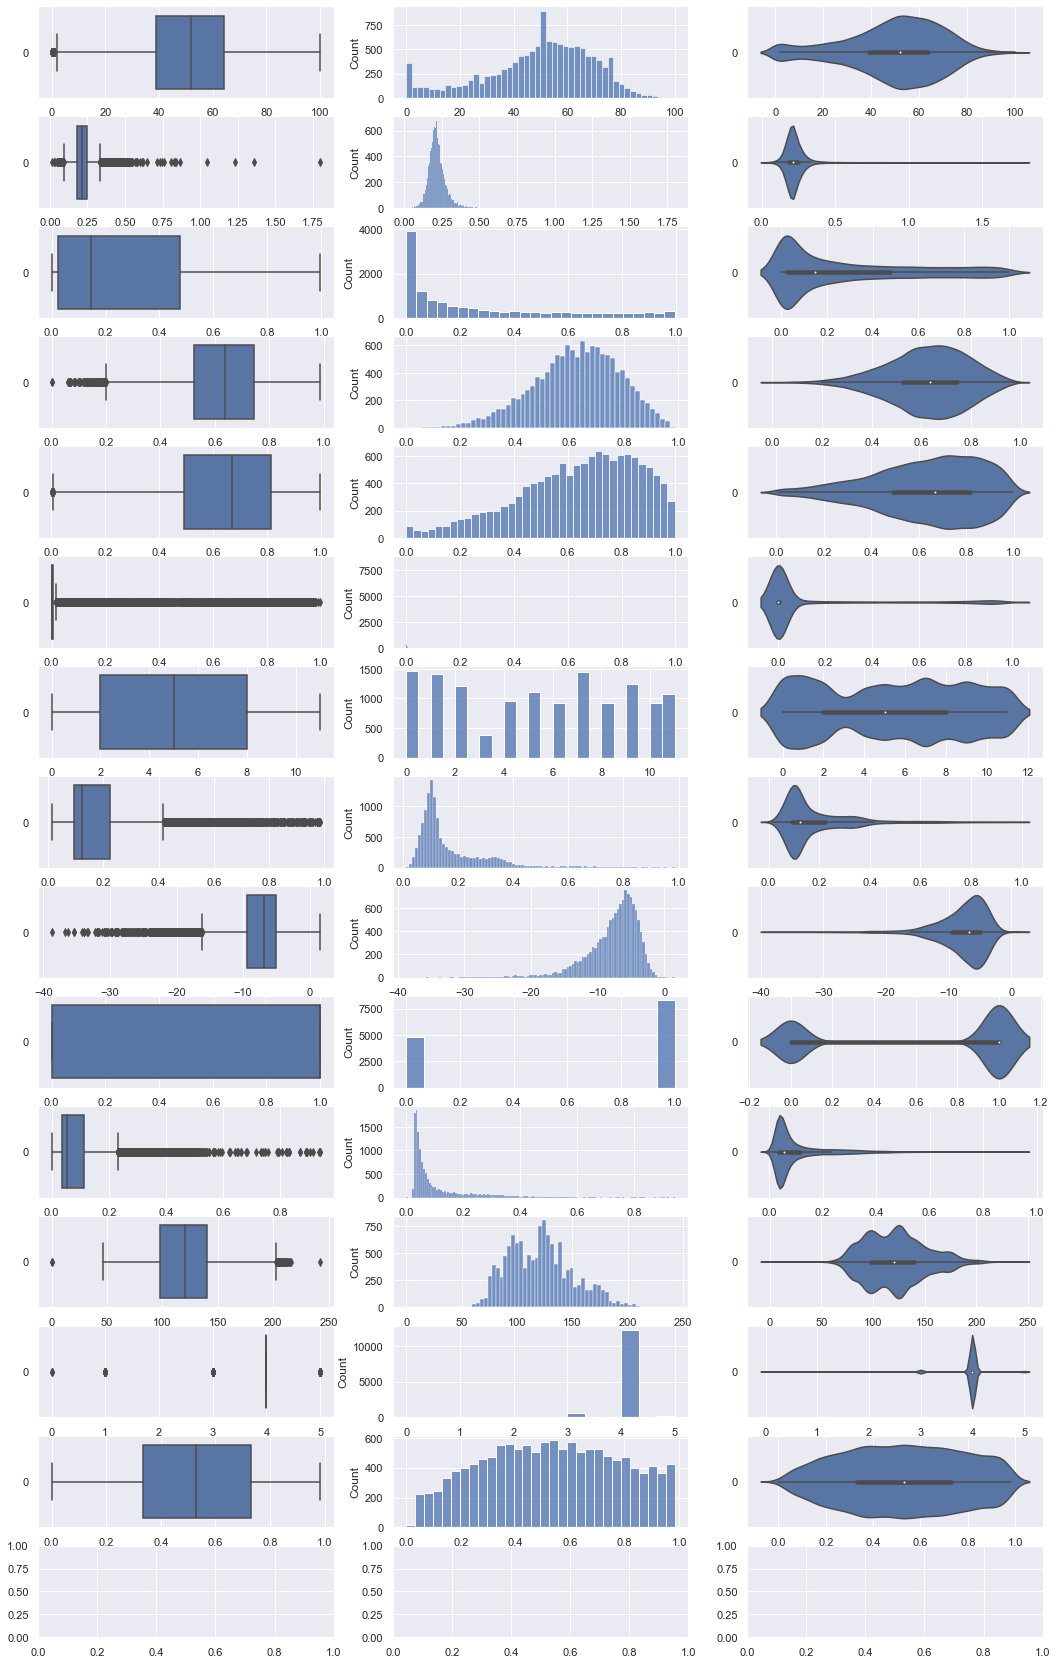

In [12]:
# Draw the histogram & violin plot distributions of all 4 variables
f, axes = plt.subplots(15, 3, figsize=(18, 30))

print("Sequence of Plots: ")
count = 0
for var in songdata:
    if(var != "song_name"):
        print(count, ") ", var)
        sb.boxplot(data = songdata[var], orient = "h", ax = axes[count,0])
        sb.histplot(data = songdata[var], ax = axes[count,1])
        sb.violinplot(data = songdata[var], orient = "h", ax = axes[count,2])
        count += 1

        print("Skewness: {:.3f}".format(songdata[var].skew()))
        print("Kurtosis: {:.3f}".format(songdata[var].kurt()))

                  song_popularity  song_duration_ms  acousticness  \
song_popularity          1.000000         -0.003765     -0.048651   
song_duration_ms        -0.003765          1.000000     -0.118931   
acousticness            -0.048651         -0.118931      1.000000   
danceability             0.051191         -0.088549     -0.179289   
energy                  -0.005173          0.103705     -0.682403   
instrumentalness        -0.101279         -0.030911      0.190493   
key                     -0.003233         -0.004651     -0.002288   
liveness                -0.038249          0.027952     -0.088927   
loudness                 0.066955          0.037074     -0.575911   
audio_mode               0.003028         -0.027194      0.060896   
speechiness             -0.000746         -0.079034     -0.089496   
tempo                   -0.027598          0.018081     -0.142803   
time_signature           0.024643          0.007913     -0.155881   
audio_valence           -0.051966 

<AxesSubplot:>

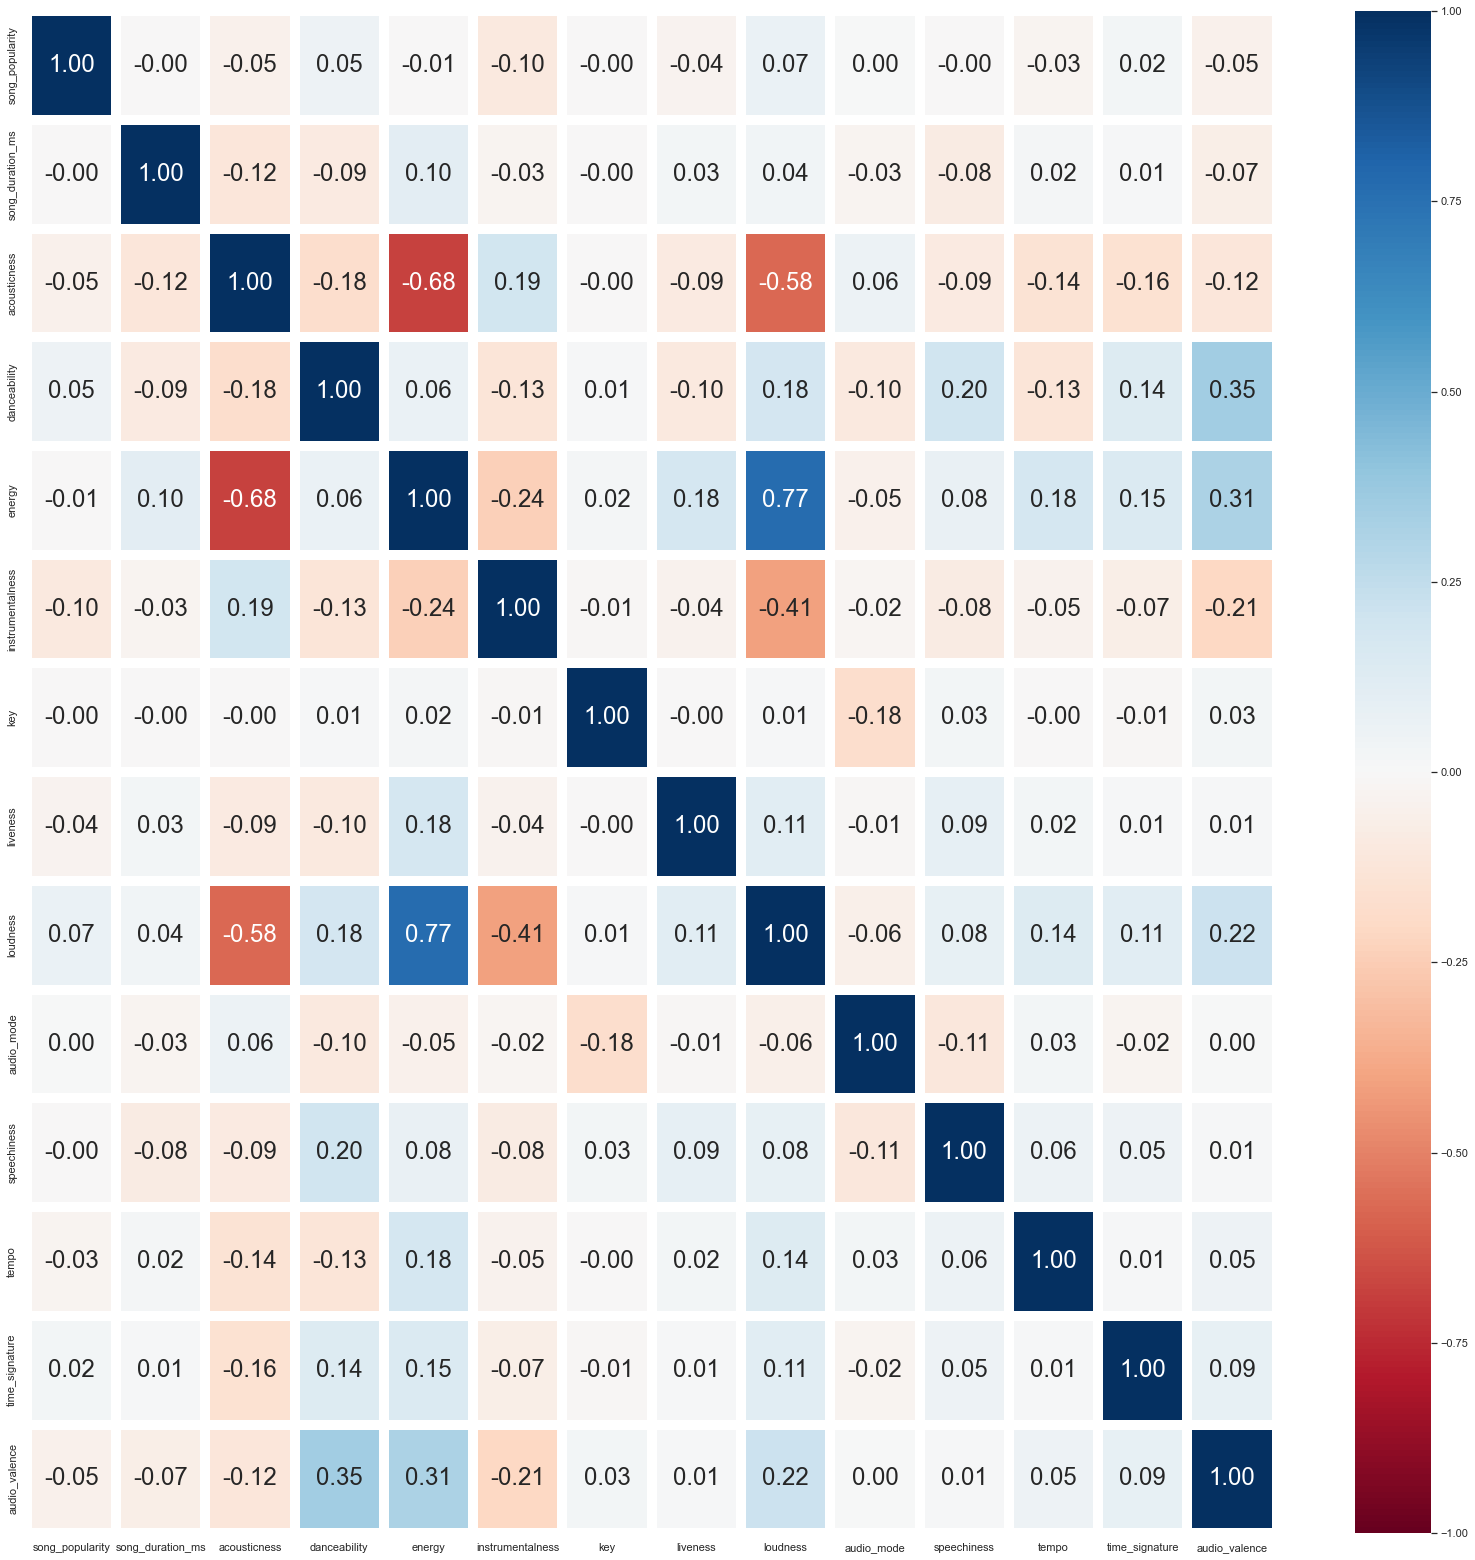

In [78]:
# Correlation Matrix
print(songdata.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(28, 28))
sb.heatmap(songdata.corr(), vmin = -1, vmax = 1, linewidths = 10,
           annot = True, fmt = ".2f", annot_kws = {"size": 24}, cmap = "RdBu")

Let's try to plot the scatter plots of Song Popularity against Instrumentalness and Danceability

Text(0, 0.5, 'Song Popularity')

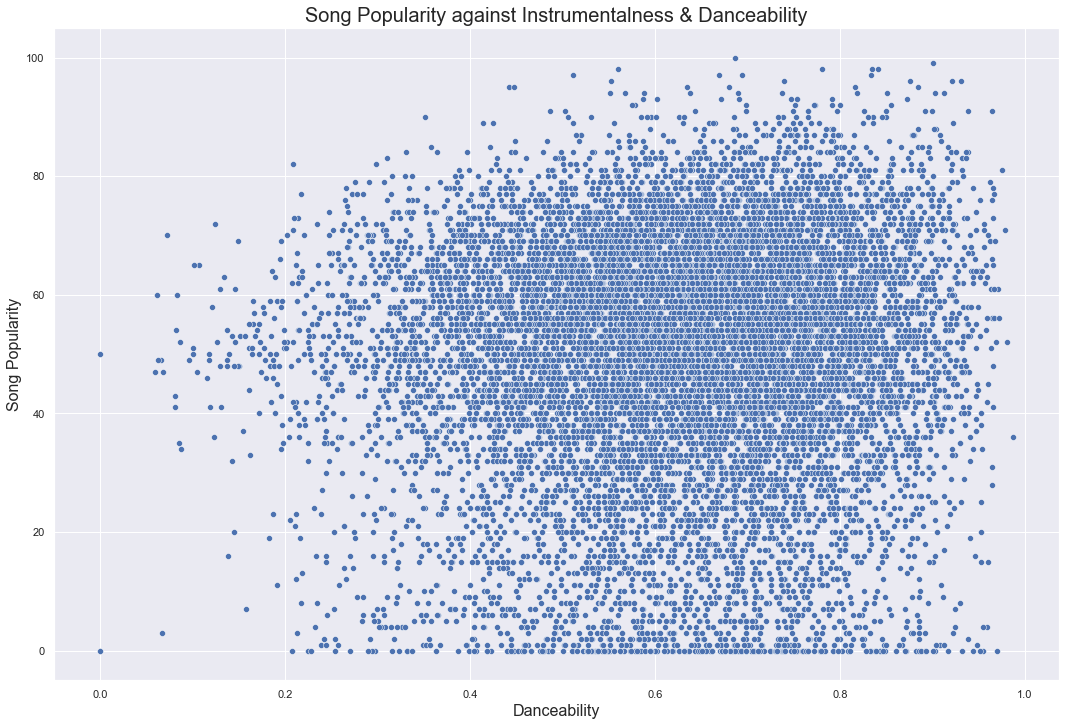

In [79]:
f, ax = plt.subplots(figsize=(18,12))
# = sb.scatterplot(x = "instrumentalness", y = "song_popularity", hue="danceability", data = songdata, palette="Greens", size="danceability")
ax = sb.scatterplot(x = "danceability", y = "song_popularity", data = songdata)

#ax.legend(loc='upper right')
ax.set_title('Song Popularity against Instrumentalness & Danceability', fontsize = 20, loc='center')
#ax.set_xlabel('Instrumentalness', fontsize = 16)
ax.set_xlabel('Danceability', fontsize = 16)
ax.set_ylabel('Song Popularity', fontsize = 16)

### Since no clear correlation is found on univariate linear regression, we use Feedforward Neural Network (Multi-layer Perceptron)


... results are as follows

MLPClassifier predicts classes that inputs fall into, and therefore we need to classify the song_popularity values and label encode them.

In [80]:
popularity_class = []

for var in songdata['song_popularity']:
    if(0 <= var and var <= 20):
        popularity_class.append(1)
    elif(21 <= var and var <= 40):
        popularity_class.append(2)
    elif(41 <= var and var <= 60):
        popularity_class.append(3)
    elif(61 <= var and var <= 80):
        popularity_class.append(4)
    else:
        popularity_class.append(5)

songdata['popularity_class'] = popularity_class
songdata.head()

from sklearn.preprocessing import LabelEncoder

# label encoding song_popularity
songdata['popularity_class'] = LabelEncoder().fit_transform(songdata['popularity_class'])
songdata.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity_class
7568,Happier,100,214289,0.1910,0.687,0.792,0.000000,5,0.1670,-2.749,1,0.0452,100.015,4,0.671,4
1229,I Love It (& Lil Pump),99,127946,0.0114,0.901,0.522,0.000000,2,0.2590,-8.304,1,0.3300,104.053,4,0.329,4
12665,Eastside (with Halsey & Khalid),98,173799,0.5550,0.560,0.680,0.000000,6,0.1160,-7.648,0,0.3210,89.391,4,0.319,4
15879,In My Feelings,98,217925,0.0589,0.835,0.626,0.000060,1,0.3960,-5.833,1,0.1250,91.030,4,0.350,4
61,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",98,212500,0.1530,0.841,0.798,0.000003,1,0.0618,-4.206,0,0.2290,95.948,4,0.591,4


We now need to scale the predictor variables so that they can be used together to predict the popularity_class.

In [81]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

songdata[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'time_signature', 'audio_valence']] = StandardScaler().fit_transform(songdata[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'time_signature', 'audio_valence']])

response = pd.DataFrame(songdata[['popularity_class']])
predictor = songdata
predictor.drop(columns=['song_popularity', 'song_name', 'song_duration_ms', 'key', 'audio_mode', 'speechiness', 'popularity_class'], inplace=True)
predictor.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,tempo,time_signature,audio_valence
7568,-0.283584,0.387013,0.694367,-0.391697,-0.092591,1.220033,-0.724565,0.149736,0.573013
1229,-0.879912,1.731778,-0.512009,-0.391697,0.540917,-0.129972,-0.586030,0.149736,-0.803285
12665,0.925010,-0.411048,0.193945,-0.391697,-0.443775,0.029452,-1.089053,0.149736,-0.843527
15879,-0.722197,1.317037,-0.047331,-0.391454,1.484293,0.470543,-1.032822,0.149736,-0.718775
61,-0.409756,1.354741,0.721176,-0.391683,-0.816994,0.865945,-0.864096,0.149736,0.251072


In [82]:
print(response)

       popularity_class
7568                  4
1229                  4
12665                 4
15879                 4
61                    4
...                 ...
14759                 0
4585                  0
11262                 0
4580                  0
11221                 0

[13070 rows x 1 columns]


Note that we are using the 'adam' solver, which is optimised for large datasets. MLPClassifier uses cross entropy loss, which measures the performance of a classification model whose output is a probability value between 0 and 1, so we scaled the song_popularity values to within the range of 0 - 1 instead of 0 - 100 (which we did using the MinMaxScaler). A batch size of 258 and max_iter 1000 seems to yield the best results (0.7970543228768171).

In [84]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

X_train, X_test, y_train, y_test = train_test_split(predictor, response, random_state=21, test_size=0.20)

#y_train_minmax = MinMaxScaler().fit_transform(y_train)
#y_train_minmax = y_train_minmax.astype('int')
#y_train_normalized = (y_train-y_train.min())/(y_train.max()-y_train.min())

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=1000,activation = 'relu',solver='adam',batch_size=258,random_state=1)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_train)

#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_train)

#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

D:\python\miniconda\envs\jupyter-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of MLPClassifier :  0.7970543228768171


Try plotting the correlation matrix.

<AxesSubplot:>

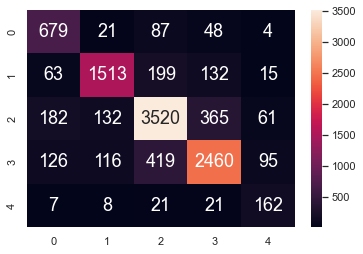

In [85]:
sb.heatmap(cm, annot=True, fmt=".0f", annot_kws={"size":18})

Check the accuracy on the test data.

In [87]:
# scale the response variable for test and predict
#y_test_minmax = MinMaxScaler().fit_transform(y_test)
#y_test_minmax = y_test_minmax.astype('int64')
#y_test_normalized = (y_test-y_test.min())/(y_test.max()-y_test.min())
y_test_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test_pred, y_test)

# print accuracy
print('Accuracy of MLPClassifier on test data :', accuracy(cm))

Accuracy of MLPClassifier on test data : 0.31943381790359604
